UWAGA: Wczytaj do Colab plik **frozen_lake_slippery.py** (intrukcja w pliku **COLAB_instrukcja.pdf**)

# **FrozenLake 2**

In [0]:
from frozen_lake_slippery import FrozenLakeEnv
import numpy as np

env = FrozenLakeEnv()

# FrozenLake z poślizgiem

W notatniku **FrozenLake_1** pracowaliśmy ze środowiskiem w którym **nie był możliwy poślizg** (plik frozen_lake.py). Oznaczało to, że po wykonaniu przez agenta pewnej akcji wiedzieliśmy do jakiego stanu agent przejdzie. Przypomnijmy następujący fragment z notatnika **FrozenLake_1**:

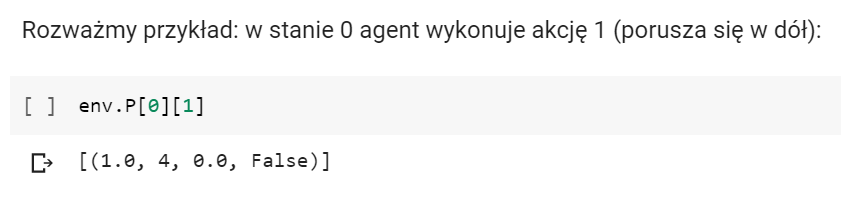

Czyli agent przeszedł ze stanu 0 do stanu 4 (z prawdopodobieństwem 1). Wykonajmy tę samą instrukcję teraz (pracujemy z plikiem **frozen_lake_slippery.py**):

In [7]:
env.P[0][1]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

A zatem otrzymujemy opis dynamiki: po wykonaniu akcji 1 w stanie 0 agent przejdzie do stanu 0 z prawdopodobieństwem 0.3333..., do stanu 4 z prawdopodobieństwem 0.3333..., do stanu 1 z prawdopodobieństwem 0.3333... Wszystkie możliwe nagrody wynoszą 0. Czyli uwzględniony jest **poślizg na lodzie**.

Zwróćmy uwagę na to, że powyższe wyrażenie jest listą, której elementami są krotki (tuples) zawierające: 

**(prawdopodobieństwo przejścia, nowy stan, nagrodę, czy nowy stan jest końcowy?)**

Poszczególne z tych wartości dla stanu początkowego **s=0** i akcji **a=1** możemy uzyskać następująco:

In [8]:
for next_state in range(len(env.P[0][1])):
    
    prob, next_state, reward, done = env.P[0][1][next_state]

    print(prob," ",next_state," ",reward," ",done)

0.3333333333333333   0   0.0   False
0.3333333333333333   4   0.0   False
0.3333333333333333   1   0.0   False


Pętla powyższa przyda się nam w implementacji jednego z algorytmów na końcu notatatnika.

# Polecenie 1 (do uzupełnienia)

Sprawdź dynamikę dla dla następujących przypadków:

W **stanie 1** agent **przechodzi w dół**:

W **stanie 10** agent **przechodzi w lewo**:

W **stanie 14** agent **przechodzi w prawo**:

# Polityka stochastyczna

Polityka to mówiąc najprościej strategia postępowania agenta. **Polityka jest stochastyczna** jeżeli w każdym stanie agent może wybrać dopuszczalne akcje z jakimiś prawdopodobieństwami < 1. **Polityka jest deterministyczna** jeżeli w każdym stanie agent wybiera pewną akcję z prawdopodobieństem 1 . 

W przypadku środowiska FrozenLake mamy **16 stanów** i **4 akcje**, a zatem **politykę stochastyczną** możemy zdefiniować np. tak:

In [3]:
stochastic_policy = np.ones([env.nS, env.nA]) / env.nA

print(stochastic_policy)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


Jest to bardzo prosta **polityka stochastyczna** w której prawdopodobieństwo wyboru każdej z akcji w dowolnym stanie wynosi **0.25**.

Prawdopodobieństwo wyboru w stanie **s** akcji **a** jest określone jako: `stochastic_policy[s][a]`

Przykład:

In [0]:
stochastic_policy[0][1]

# Polecenie 2 (do uzupełnienia)

Zdefiniuj politykę stochastyczną w której **dla różnych akcji będa różne wartości prawdopodobieństwa ich wyboru**. 

# Algorytm iteracyjnego obliczenia polityki

Algorytm ten pozwala znaleźć **wartości oczekiwane zwrotów V(s)** dla każdego stanu **s** przy założeniu, że **agent wykorzystuje pewną politykę** oznaczoną zwykle przez **pi**. Algorytm wygląda następująco:

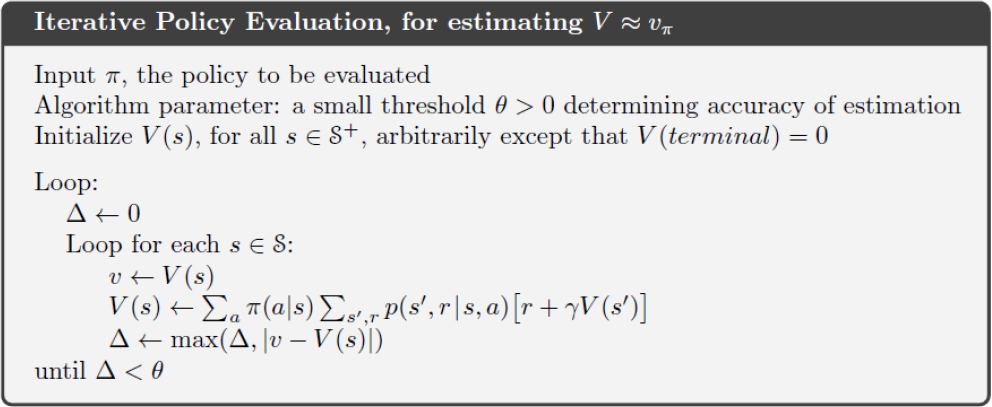

Początkowo przyjmujemy, że **V(s)=0** dla każdego stanu **s**. Możemy to zapisać tak:

In [0]:
V = np.zeros(env.nS)

Sprawdzamy:

In [5]:
print(V)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Jak działa algorytm? Zacznimy od uproszczonej postaci:
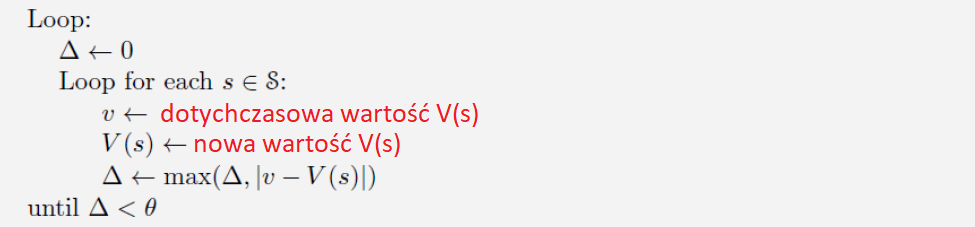

Zewnętrzna pętla (**Loop... until...**) służy do sprawdzenia jak duże były ostatnio **wprowadzone modyfikacje wartości V(s)**. Jeżeli były niewielkie (**Delta<Theta**) wówczas następuje przerwanie pętli (**Delta** jest zawsze modyfikowana po zmianie wartości V(s) i ostatecznie jest równa **największej z modyfikacji V(s)** biorąc pod uwagę wszysktie stany).

Powyższe pętle można zrealizować w następujący sposób:

In [0]:
while True:
  delta = .0
  for state in range(env.nS):# env.nS=16
    
    #tutaj musimy wyliczyć nową wartość V(s)                       
                  
    delta = max(delta, np.abs(V[state] - Vs)) 
  if delta < theta:
    break

Jak wyliczyć wartość **V(s)**? Zgodnie z algorytmem musimy skorzystać z **równania Bellmana**:

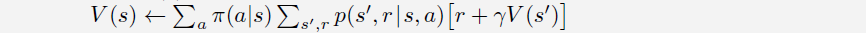

Wartość **V(s)** obliczamy biorąc pod uwagę wartości **V(s')** wszystkich stanów do których może przejść agent ze stanu **s**. 

Zwróćmy uwagę, że sumujemy **po wszystkich akcjach**, które mogą być wykonane w stanie **s** i sumujemy po wszystkich stanach **s'** do których agent może przejść ze stanu **s** oraz po wszystkich możliwych nagrodach **r**.  

Wielkość **p(s',r|s,a)** jest prawdopodobieństem tego, że po wykonaniu w **stanie s akcji a** agent przejdzie do **stanu s'** i otrzyma przy tym **nagrodę r**. 

Nową wartość Vs możemy wyliczyć następująco:

In [0]:
Vs = 0
#sumowanie po wszystkich akcjach możliwych do wykonania w stanie s
for action in range(env.nA):

  #sumowanie po wszystkich stanach do których może przejść agent ze stanu s
  for next_state in range(len(env.P[state][action])):
    
    prob, next_state, reward, done = env.P[state][action][next_state]
    
    Vs += policy[state][action] * prob * (reward + gamma * V[next_state])


Teraz już możesz wykonać **Zadanie 3** z **RL_lab_4.pdf**. W tym celu uzupełnij definicję poniższej funkcji **policy_evaluation** pozwalającej dla danej **polityki** (zdefiniowana powyżej) i **parametrów gamma i theta** znaleść **wartość oczekiwane zwrotów V(s)**.

In [0]:
def policy_evaluation(env, policy, gamma=0.8, theta=1e-8):
    V = np.zeros(env.nS)
    
    while True:
        delta = .0
        for state in range(env.nS):
            
        #do uzupełnienia

        if delta < theta:
            break
    
    return V       

Użycie funkcji:

In [0]:
V = policy_evaluation(env,stochastic_policy)

Wypisanie wyliczonych wartości zwrotów:

In [0]:
print(V)